In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import csv
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

csvpath = os.path.join('owid-covid-data.csv')

In [3]:
covid = pd.read_csv("owid-covid-data.csv", dtype="object", encoding="utf-8").reset_index()
covid.head()

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


<AxesSubplot:>

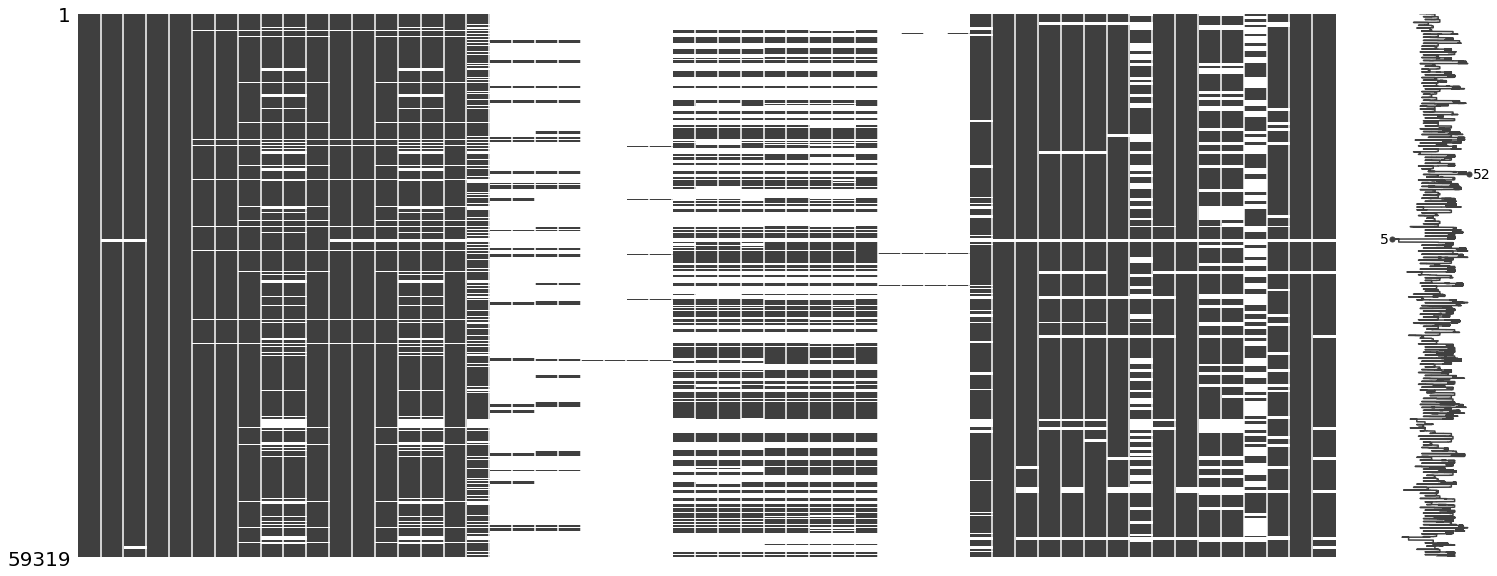

In [4]:
msno.matrix(covid)

In [5]:
covid.describe()

,index
count,59319.000000
mean,29659.000000
std,17124.064646
min,0.000000
25%,14829.500000
50%,29659.000000
75%,44488.500000
max,59318.000000


In [6]:
covid.count()

index                                 59319
iso_code                              58980
continent                             58624
location                              59319
date                                  59319
total_cases                           58772
new_cases                             58765
new_cases_smoothed                    57810
total_deaths                          50365
new_deaths                            50364
new_deaths_smoothed                   57810
total_cases_per_million               58433
new_cases_per_million                 58426
new_cases_smoothed_per_million        57476
total_deaths_per_million              50039
new_deaths_per_million                50038
new_deaths_smoothed_per_million       57476
reproduction_rate                     44995
icu_patients                           6129
icu_patients_per_million               6129
hosp_patients                          6867
hosp_patients_per_million              6867
weekly_icu_admissions           

In [7]:
#organized_df = covid[["continent", "location", "date", "total_cases","total_deaths","gdp_per_capita", "hospital_beds_per_thousand", "new_cases", "median_age", "population", "aged_65_older", "aged_70_older","total_tests" ]]
#organized_df = covid[["continent", "location", "date", "new_cases", "new_deaths", "gdp_per_capita", "hospital_beds_per_thousand", "median_age"]]
#organized_df = covid[["continent", "location", "date", "new_deaths", "hospital_beds_per_thousand"]]

In [8]:
organized_df = covid[["continent", "location", "new_deaths", "hospital_beds_per_thousand"]]

In [9]:
organized_df.head()

,continent,location,new_deaths,hospital_beds_per_thousand
0,Asia,Afghanistan,NaN,0.5
1,Asia,Afghanistan,NaN,0.5
2,Asia,Afghanistan,NaN,0.5
3,Asia,Afghanistan,NaN,0.5
4,Asia,Afghanistan,NaN,0.5


In [10]:
organized_df.count()

continent                     58624
location                      59319
new_deaths                    50364
hospital_beds_per_thousand    52429
dtype: int64

In [11]:
organized_df = organized_df.dropna(how='any')

In [12]:
organized_df.count()

continent                     44409
location                      44409
new_deaths                    44409
hospital_beds_per_thousand    44409
dtype: int64

In [13]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand
27,Asia,Afghanistan,1.0,0.5
28,Asia,Afghanistan,0.0,0.5
29,Asia,Afghanistan,0.0,0.5
30,Asia,Afghanistan,1.0,0.5
31,Asia,Afghanistan,1.0,0.5
...,...,...,...,...
59314,Africa,Zimbabwe,13.0,1.7
59315,Africa,Zimbabwe,15.0,1.7
59316,Africa,Zimbabwe,22.0,1.7
59317,Africa,Zimbabwe,15.0,1.7


In [14]:
#check the data type
print(organized_df.dtypes)

continent                     object
location                      object
new_deaths                    object
hospital_beds_per_thousand    object
dtype: object


In [15]:
# Use pd.to_numeric() method to convert the datatype of the new_deaths & hospital_beds_per_thousand column
organized_df['new_deaths'] = pd.to_numeric(organized_df['new_deaths'])
organized_df['hospital_beds_per_thousand'] = pd.to_numeric(organized_df['hospital_beds_per_thousand'])

In [16]:
#check the data type again
print(organized_df.dtypes)

continent                      object
location                       object
new_deaths                    float64
hospital_beds_per_thousand    float64
dtype: object


# Total deaths VS Hospital beds per thousand

In [17]:
# The sum method adds every entry in the series
total1 = organized_df["new_deaths"].sum()
total1

1927389.0

In [18]:
# The mean method averages the series
average1 = organized_df["new_deaths"].mean()
average1

43.400864689589945

In [19]:
# The sum method adds every entry in the series
total2 = organized_df["hospital_beds_per_thousand"].sum()
total2

136376.92500000002

In [20]:
# The mean method averages the series
average2 = organized_df["hospital_beds_per_thousand"].mean()
average2

3.0709298790785655

In [21]:
# The unique method shows every element of the series that appears only once
unique1 = organized_df["location"].unique()
unique1

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakh

In [22]:
# The unique method shows every element of the series that appears only once
unique2 = organized_df["continent"].unique()
unique2

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [23]:
# The value_counts method counts unique values in a column
count1 = organized_df["continent"].value_counts()
count1

Europe           12935
Asia             11176
Africa           10628
North America     5352
South America     3550
Oceania            768
Name: continent, dtype: int64

In [24]:
# The value_counts method counts unique values in a column
count2 = organized_df["location"].value_counts()
count2

China          354
Philippines    344
Japan          333
France         331
Iran           327
              ... 
Fiji           164
Vietnam        164
Saint Lucia     62
Eritrea         20
Mongolia        13
Name: location, Length: 155, dtype: int64

In [25]:
organized_df.describe()

,new_deaths,hospital_beds_per_thousand
count,44409.000000,44409.000000
mean,43.400865,3.070930
std,173.866322,2.525701
min,-1918.000000,0.100000
25%,0.000000,1.300000
50%,1.000000,2.400000
75%,13.000000,4.210000
max,4194.000000,13.800000


In [26]:
# Create a new DataFrame that looks into a specific region (eg: Italy)
Italy_df = organized_df.loc[organized_df["location"] == "Italy"]
Italy_df

,continent,location,new_deaths,hospital_beds_per_thousand
26268,Europe,Italy,1.0,3.18
26269,Europe,Italy,1.0,3.18
26270,Europe,Italy,1.0,3.18
26271,Europe,Italy,4.0,3.18
26272,Europe,Italy,3.0,3.18
...,...,...,...,...
26588,Europe,Italy,548.0,3.18
26589,Europe,Italy,414.0,3.18
26590,Europe,Italy,620.0,3.18
26591,Europe,Italy,483.0,3.18


In [27]:
organized_df

,continent,location,new_deaths,hospital_beds_per_thousand
27,Asia,Afghanistan,1.0,0.5
28,Asia,Afghanistan,0.0,0.5
29,Asia,Afghanistan,0.0,0.5
30,Asia,Afghanistan,1.0,0.5
31,Asia,Afghanistan,1.0,0.5
...,...,...,...,...
59314,Africa,Zimbabwe,13.0,1.7
59315,Africa,Zimbabwe,15.0,1.7
59316,Africa,Zimbabwe,22.0,1.7
59317,Africa,Zimbabwe,15.0,1.7


In [28]:
# It is also possible to group a DataFrame by multiple columns
# This returns an object with multiple indexes, however, which can be harder to deal with
grouped_international_data = organized_df.groupby(['continent', 'location'])

grouped_international_data.count().head(20)

new_deaths  hospital_beds_per_thousand
continent location                                                        
Africa    Algeria                          305                         305
          Benin                            280                         280
          Botswana                         286                         286
          Burkina Faso                     299                         299
          Burundi                          273                         273
          Cameroon                         292                         292
          Cape Verde                       293                         293
          Central African Republic         233                         233
          Comoros                          250                         250
          Djibouti                         276                         276
          Egypt                            309                         309
          Equatorial Guinea                264                         264
          Eritrea                           20                          20
          Eswatini                         270                         270
          Ethiopia                         281                         281
          Gabon                            297                         297
          Gambia                           294                         294
          Ghana                            296                         296
          Guinea                           271                         271
          Kenya                            291                         291

In [29]:
grouped_international_data = organized_df.groupby(['continent', 'location']).agg({'new_deaths':'sum','hospital_beds_per_thousand':'mean'})
grouped_international_data

new_deaths  hospital_beds_per_thousand
continent     location                                            
Africa        Algeria           2807.0                         1.9
              Benin               44.0                         0.5
              Botswana            48.0                         1.8
              Burkina Faso        89.0                         0.4
              Burundi              2.0                         0.8
...                                ...                         ...
South America Paraguay          2405.0                         1.3
              Peru             38049.0                         1.6
              Suriname           133.0                         3.1
              Uruguay            256.0                         2.8
              Venezuela         1061.0                         0.8

[155 rows x 2 columns]

In [30]:
# Rename columns for readability
covid_renamed_df = grouped_international_data.rename(columns={"new_deaths": "Total deaths", "hospital_beds_per_thousand": "Hospital beds per thousand"})
covid_renamed_df

Total deaths  Hospital beds per thousand
continent     location                                              
Africa        Algeria             2807.0                         1.9
              Benin                 44.0                         0.5
              Botswana              48.0                         1.8
              Burkina Faso          89.0                         0.4
              Burundi                2.0                         0.8
...                                  ...                         ...
South America Paraguay            2405.0                         1.3
              Peru               38049.0                         1.6
              Suriname             133.0                         3.1
              Uruguay              256.0                         2.8
              Venezuela           1061.0                         0.8

[155 rows x 2 columns]

In [31]:
# Sorting the DataFrame based on "Hospital beds per thousand" column
hospital_beds_per_thousand_high = covid_renamed_df.sort_values("Hospital beds per thousand", ascending=False)
hospital_beds_per_thousand_high.head()

Total deaths  Hospital beds per thousand
continent location                                             
Europe    Monaco                4.0                       13.80
Asia      Japan              3850.0                       13.05
          South Korea        1140.0                       12.27
Europe    Belarus            1517.0                       11.00
          Ukraine           20641.0                        8.80

In [32]:
# Sorting the DataFrame based on "Hospital beds per thousand" column
hospital_beds_per_thousand_low = covid_renamed_df.sort_values("Hospital beds per thousand")
hospital_beds_per_thousand_low.head()

Total deaths  Hospital beds per thousand
continent location                                            
Africa    Mali               298.0                         0.1
          Madagascar         267.0                         0.2
          Niger              126.0                         0.3
          Ethiopia          1994.0                         0.3
          Guinea              81.0                         0.3

In [33]:
# Sorting the DataFrame based on "Total deaths" column
total_deaths_high = covid_renamed_df.sort_values("Total deaths", ascending=False)
total_deaths_high.head()

,,Total deaths,Hospital beds per thousand
continent,location,,
North America,United States,374322.0,2.77
South America,Brazil,203100.0,2.20
Asia,India,151160.0,0.53
North America,Mexico,133706.0,1.38
Europe,United Kingdom,81567.0,2.54


In [34]:
# Sorting the DataFrame based on "hospital_beds_per_thousand" column
total_deaths_low = covid_renamed_df.sort_values("Total deaths")
total_deaths_low.head()

Total deaths  Hospital beds per thousand
continent location                                          
Oceania   Fiji               2.0                         2.3
Africa    Burundi            2.0                         0.8
Asia      Mongolia           2.0                         7.0
          Brunei             3.0                         2.7
Africa    Eritrea            3.0                         0.7

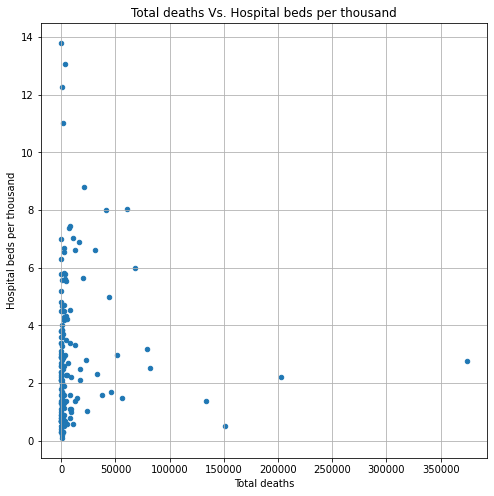

In [35]:
# Create a scatter plot which compares total deaths to hospital beds per thousand
covid_renamed_df.plot(kind="scatter", x="Total deaths", y="Hospital beds per thousand", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.show()

In [36]:
sort = covid_renamed_df.sort_values("Total deaths", ascending=False)
without_outliers = sort[2:]
without_outliers

Total deaths  Hospital beds per thousand
continent     location                                                
Asia          India               151160.0                        0.53
North America Mexico              133706.0                        1.38
Europe        United Kingdom       81567.0                        2.54
              Italy                78755.0                        3.18
              France               67885.0                        5.98
...                                    ...                         ...
Africa        Eritrea                  3.0                        0.70
Asia          Brunei                   3.0                        2.70
Africa        Burundi                  2.0                        0.80
Asia          Mongolia                 2.0                        7.00
Oceania       Fiji                     2.0                        2.30

[153 rows x 2 columns]

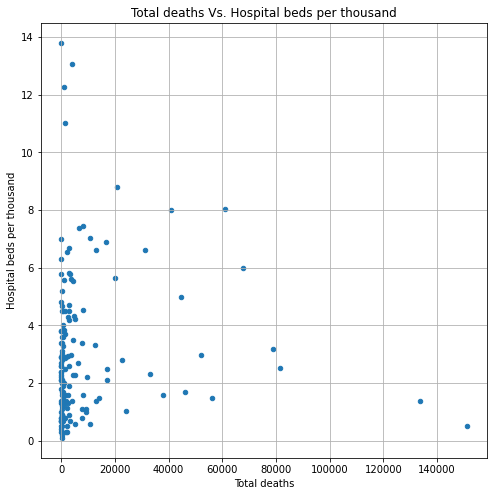

In [37]:
# Create a scatter plot which compares total deaths to hospital beds per thousand
without_outliers.plot(kind="scatter", x="Total deaths", y="Hospital beds per thousand", grid=True, figsize=(8,8),
              title="Total deaths Vs. Hospital beds per thousand")
plt.show()

In [38]:
# Compute the Pearson correlation coefficient between "Total deaths" and "Hospital beds per thousand"
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
correlation = st.pearsonr(Total_deaths,Hospital_beds_per_thousand)
print(f"The correlation between both factors is {round(correlation[0],10)}")

The correlation between both factors is 0.0021324988


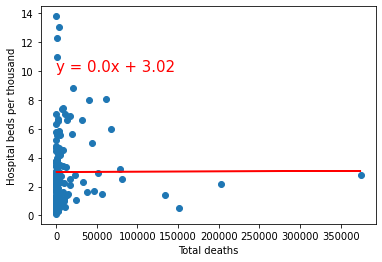

In [39]:
# Add the linear regression equation and line to plot
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['Hospital beds per thousand']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Hospital beds per thousand')
plt.show()

The r-squared is: 4.5475513305018905e-06


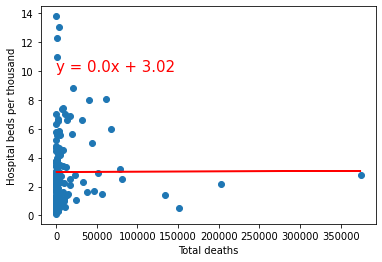

In [40]:
# Print out the r-squared value along with the plot.
x_values = covid_renamed_df['Total deaths']
y_values = covid_renamed_df['Hospital beds per thousand']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Hospital beds per thousand')
print(f"The r-squared is: {rvalue**2}")
plt.show()

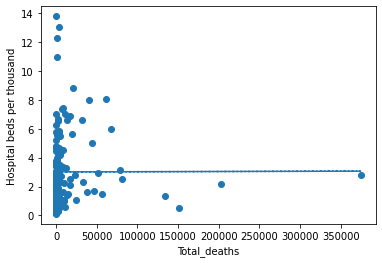

In [41]:
# Perform a linear regression on total deaths versus hospital beds per thousand
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Total_deaths, Hospital_beds_per_thousand)

# Create equation of line to calculate predicted hospital beds per thousand
vc_fit = vc_slope * Total_deaths + vc_int

# Plot the linear model on top of scatter plot 
Total_deaths = covid_renamed_df["Total deaths"]
Hospital_beds_per_thousand = covid_renamed_df["Hospital beds per thousand"]
plt.scatter(Total_deaths,Hospital_beds_per_thousand)
plt.plot(Total_deaths,vc_fit,"--")
##plt.xticks(Total deaths, rotation=90)???
plt.xlabel('Total_deaths')
plt.ylabel('Hospital beds per thousand')
plt.show()

In [42]:
#organized_df['continent'].value_counts()

In [43]:
#organized_df['date'] = pd.to_datetime(organized_df["date"])
#organized_df['date']

In [44]:
#organized_df['mnth_yr'] = organized_df['date'].apply(lambda x: x.strftime('%B-%Y')) 
#organized_df['month_year'] = organized_df['date'].dt.strftime('%B-%Y')
#organized_df

In [45]:
#organized_df["year"] = organized_df["date"].dt.year
#organized_df["month"] = organized_df["date"].dt.month
#organized_df

In [46]:
#organized_group = organized_df.groupby(["location", "continent"]).sum()
#organized_group = organized_df.groupby(["location", "continent", "new_deaths", "hospital_beds_per_thousand"]).sum()
#organized_group

# Total Deaths vs Median age


In [47]:
#

# Total Deaths and Total GDP

In [48]:
#

# Total Deaths vs Total Cases

In [49]:
#getting the required columns
organized4_df = covid[["continent", "location", "new_deaths", "new_cases", "total_deaths", "total_cases"]].copy()
organized4_df = organized4_df.dropna(how='any')
organized4_df

,continent,location,new_deaths,new_cases,total_deaths,total_cases
27,Asia,Afghanistan,1.0,4.0,1.0,34.0
28,Asia,Afghanistan,0.0,7.0,1.0,41.0
29,Asia,Afghanistan,0.0,2.0,1.0,43.0
30,Asia,Afghanistan,1.0,33.0,2.0,76.0
31,Asia,Afghanistan,1.0,4.0,3.0,80.0
...,...,...,...,...,...,...
59314,Africa,Zimbabwe,13.0,610.0,431.0,17804.0
59315,Africa,Zimbabwe,15.0,871.0,446.0,18675.0
59316,Africa,Zimbabwe,22.0,985.0,468.0,19660.0
59317,Africa,Zimbabwe,15.0,839.0,483.0,20499.0


In [50]:
#checking the data type
organized4_df.dtypes

continent       object
location        object
new_deaths      object
new_cases       object
total_deaths    object
total_cases     object
dtype: object

In [51]:
#change the data type to numerical
organized4_df['new_deaths'] = pd.to_numeric(organized4_df['new_deaths'])
organized4_df['new_cases'] = pd.to_numeric(organized4_df['new_cases'])
organized4_df['total_deaths'] = pd.to_numeric(organized4_df['total_deaths'])
organized4_df['total_cases'] = pd.to_numeric(organized4_df['total_cases'])
#rechecking
organized4_df.dtypes

continent        object
location         object
new_deaths      float64
new_cases       float64
total_deaths    float64
total_cases     float64
dtype: object

In [52]:
# The sum method adds every entry in the series
total_death = organized4_df["new_deaths"].sum()
print(f"Sum of total death = {total_death}")

total_case = organized4_df["new_cases"].sum()
print(f"Sum of total cases = {total_case}")

# getting the mean of both
avg_death = organized4_df["new_deaths"].mean()
avg_cases = organized4_df["new_cases"].mean()
print(f"Mean of total death = {avg_death}")
print(f"Mean of total cases = {avg_cases}")

Sum of total death = 1934532.0
Sum of total cases = 89425767.0
Mean of total death = 38.9382875085544
Mean of total cases = 1799.9631053500261


In [53]:
organized4_df.describe()

,new_deaths,new_cases,total_deaths,total_cases
count,49682.000000,49682.000000,49682.000000,4.968200e+04
mean,38.938288,1799.963105,4872.895234,1.711569e+05
std,164.893166,9428.683972,20398.526835,8.842266e+05
min,-1918.000000,-46076.000000,1.000000,1.000000e+00
25%,0.000000,6.000000,27.000000,1.445000e+03
50%,1.000000,82.000000,151.000000,8.643000e+03
75%,10.000000,621.000000,1314.000000,6.720600e+04
max,4194.000000,302506.000000,374322.000000,2.240675e+07


In [54]:
# checking each country
grouped_inter_data = organized4_df.groupby(['continent', 'location']).agg({'new_deaths':'sum','new_cases':'sum'})

# renaming the columns
covid_renamed4_df = grouped_inter_data.rename(columns={"new_deaths": "Total deaths", "new_cases": "Total Cases"})
covid_renamed4_df

Total deaths  Total Cases
continent     location                               
Africa        Algeria             2807.0     102124.0
              Angola               416.0      18188.0
              Benin                 44.0       3282.0
              Botswana              48.0      16047.0
              Burkina Faso          89.0       8067.0
...                                  ...          ...
South America Paraguay            2405.0     115720.0
              Peru               38049.0    1025946.0
              Suriname             133.0       6998.0
              Uruguay              256.0      25912.0
              Venezuela           1061.0     116503.0

[175 rows x 2 columns]

In [55]:
# the most total death and least has been printed in the beginning

# getting the most total cases
total_cases_high4 = covid_renamed4_df.sort_values("Total Cases", ascending=False)
total_cases_high4.head()

Total deaths  Total Cases
continent     location                                 
North America United States       374322.0   22406730.0
Asia          India               151160.0   10466539.0
South America Brazil              203100.0    8105590.0
Europe        Russia               60963.0    3366568.0
              United Kingdom       81567.0    3081073.0

In [56]:
# getting the least total cases
total_cases_low4 = covid_renamed4_df.sort_values("Total Cases")
total_cases_low4.head()

,,Total deaths,Total Cases
continent,location,,
Oceania,Fiji,2.0,26.0
Asia,Brunei,3.0,58.0
North America,Antigua and Barbuda,5.0,161.0
Asia,Mongolia,2.0,267.0
North America,Saint Lucia,5.0,297.0


The r-squared is: 0.9115186271439102


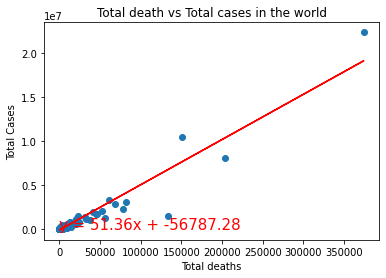

<Figure size 432x288 with 0 Axes>

In [79]:
# making plot
lines = covid_renamed4_df.plot.scatter(x='Total deaths', y='Total Cases')

# Print out the r-squared value along with the plot.
x_values = covid_renamed4_df['Total deaths']
y_values = covid_renamed4_df['Total Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total deaths')
plt.ylabel('Total Cases')
plt.title('Total death vs Total cases in the world')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('scatter_cases.png')

In [58]:
covid_renamed6_df = covid_renamed4_df.reset_index()

In [59]:
covid_renamed6_df = organized4_df[organized4_df["location"] == "United States"]
covid_renamed6_df

,continent,location,new_deaths,new_cases,total_deaths,total_cases
56138,North America,United States,1.0,8.0,1.0,25.0
56139,North America,United States,0.0,7.0,1.0,32.0
56140,North America,United States,5.0,23.0,6.0,55.0
56141,North America,United States,1.0,19.0,7.0,74.0
56142,North America,United States,4.0,33.0,11.0,107.0
...,...,...,...,...,...,...
56450,North America,United States,3854.0,250381.0,361123.0,21354750.0
56451,North America,United States,4194.0,280741.0,365317.0,21635491.0
56452,North America,United States,3939.0,292521.0,369256.0,21928012.0
56453,North America,United States,3252.0,264830.0,372508.0,22192842.0


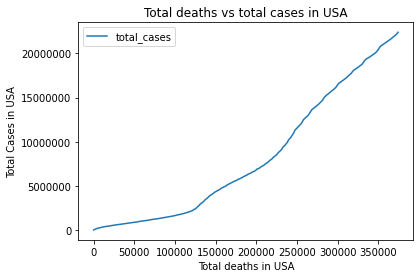

In [80]:
#line graph for the highest total cases
covid_renamed6_df.plot(x='total_deaths', y='total_cases').get_figure()
plt.ticklabel_format(style = 'plain')
plt.xlabel('Total deaths in USA')
plt.ylabel('Total Cases in USA')
plt.title("Total deaths vs total cases in USA")
plt.savefig('lineusa_totaldeathsvscases.png')

In [61]:
covid_renamed5_df = organized4_df[organized4_df["location"] == "Fiji"]
covid_renamed5_df

,continent,location,new_deaths,new_cases,total_deaths,total_cases
18332,Oceania,Fiji,1.0,0.0,1.0,27.0
18333,Oceania,Fiji,0.0,0.0,1.0,27.0
18334,Oceania,Fiji,0.0,0.0,1.0,27.0
18335,Oceania,Fiji,0.0,0.0,1.0,27.0
18336,Oceania,Fiji,0.0,0.0,1.0,27.0
...,...,...,...,...,...,...
18491,Oceania,Fiji,0.0,0.0,2.0,53.0
18492,Oceania,Fiji,0.0,0.0,2.0,53.0
18493,Oceania,Fiji,0.0,0.0,2.0,53.0
18494,Oceania,Fiji,0.0,0.0,2.0,53.0


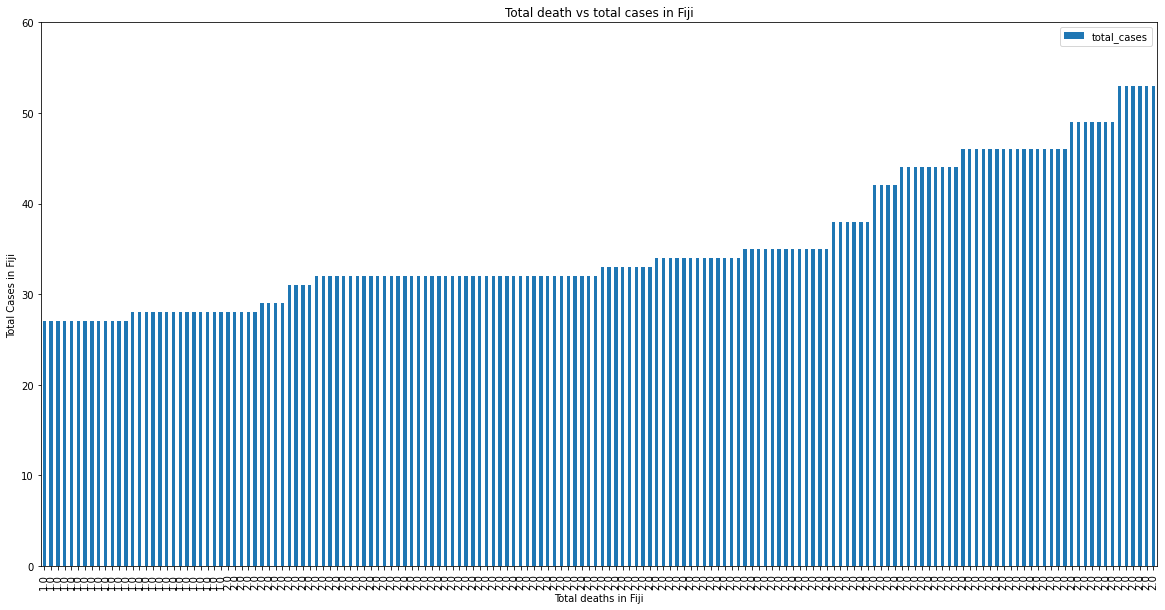

In [81]:
#line graph for the lowest total cases
covid_renamed5_df.plot.bar(x='total_deaths', y='total_cases', xlim=(0,10), ylim=(0,60), figsize=(20,10)).get_figure()
plt.xlabel('Total deaths in Fiji')
plt.ylabel('Total Cases in Fiji')
plt.title('Total death vs total cases in Fiji')
plt.savefig('barfiji_totaldeathsvscases.png')

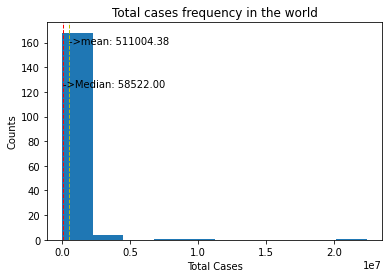

The mean of total cases is 511004.38285714283
The median of total cases is 58522.0
The population variance using the NumPy module is 4000075059340.625
The population standard deviation using the NumPy module is 2000018.7647471274
Roughly 68% of the data is between -1489014.382 and 2511023.148
Roughly 95% of the data is between -3489033.147 and 4511041.912
Roughly 99.7% of the data is between -5489051.911 and 6511060.677


In [87]:
plt.hist(covid_renamed4_df['Total Cases'])
plt.xlabel('Total Cases')
plt.ylabel('Counts')
plt.title('Total cases frequency in the world')
plt.axvline(covid_renamed4_df['Total Cases'].mean(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(covid_renamed4_df['Total Cases'].median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(covid_renamed4_df['Total Cases'].mean()*1, max_ylim*0.9, '->mean: {:.2f}'.format(covid_renamed4_df['Total Cases'].mean()))
plt.text(covid_renamed4_df['Total Cases'].median()*1, max_ylim*0.7, '->Median: {:.2f}'.format(covid_renamed4_df['Total Cases'].median()))
plt.savefig('Total Deaths Hist', bbox_inches = "tight", dpi=300)
plt.show()

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(covid_renamed4_df['Total Cases'])
print(f"The mean of total cases is {mean_numpy}")
median_numpy = np.median(covid_renamed4_df['Total Cases'])
print(f"The median of total cases is {median_numpy}")

# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(covid_renamed4_df['Total Cases'],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")
sd_numpy = np.std(covid_renamed4_df['Total Cases'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

In [67]:
boxplotcases = covid_renamed4_df['Total Cases']
boxplotcases

continent      location    
Africa         Algeria          102124.0
               Angola            18188.0
               Benin              3282.0
               Botswana          16047.0
               Burkina Faso       8067.0
                                 ...    
South America  Paraguay         115720.0
               Peru            1025946.0
               Suriname           6998.0
               Uruguay           25912.0
               Venezuela        116503.0
Name: Total Cases, Length: 175, dtype: float64

In [88]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = boxplotcases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of total cases is: {lowerq}")
print(f"The upper quartile of total cases is: {upperq}")
print(f"The interquartile range of total cases is: {iqr}")
print(f"The the median of total cases is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of total cases is: 8534.0
The upper quartile of total cases is: 227539.0
The interquartile range of total cases is: 219005.0
The the median of total cases is: 58522.0 
Values below -319973.5 could be outliers.
Values above 556046.5 could be outliers.


In [ ]:
# Export file as a CSV, without the Pandas index, but with the header
#organized_df.to_csv("fileOne.csv", index=False, header=True)